In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import sys
sys.path.append("../mpi_scripts/")
from io_utils import collect_results

# Load results

In [15]:
case = "210720_175339"
dirname_results = '../../results/ina'
result = collect_results(case, dirname_results, dump_keys=['best'])

In [16]:
result

{'config': {'n_organisms': 16,
  'n_elites': 2,
  'n_generations': 100,
  'output_folder_name': '../../results/ina/',
  'loss': 'RMSE',
  'columns_control': ['I_out'],
  'columns_model': ['I_out'],
  'column_stim_protocol': ['v'],
  'filename_so': '../../src/model_ctypes/ina/ina.so',
  'filename_legend_states': '../../src/model_ctypes/ina/legend_states.csv',
  'filename_legend_constants': '../../src/model_ctypes/ina/legend_constants.csv',
  'filename_legend_algebraic': '../../src/model_ctypes/ina/legend_algebraic.csv',
  'filename_protocol': '../../data/protocols/protocol_trace.csv',
  'filename_initial_state_protocol': '../../data/protocols/protocol_initial_state.csv',
  'experimental_conditions': {'common': {'params': {'c_p': {'bounds': [0.1,
       10],
      'gamma': 1,
      'is_multiplier': True},
     'c_m': {'bounds': [0.1, 10], 'gamma': 1, 'is_multiplier': True},
     'a0_m': {'bounds': [0.1, 10], 'gamma': 1, 'is_multiplier': True},
     'b0_m': {'bounds': [0.1, 10], 'gamma': 

In [18]:
config = result['config'].copy()
sol_best = result['sol_best'].copy()
phenotype_best = result['phenotype_best'].copy()
sol_best.round(2)

ec_name  g_name     
common   c_p             0.12
         c_m             0.79
         a0_m            3.30
         b0_m            8.87
         delta_m         2.13
         s_m             0.59
         a0_h            2.33
         b0_h            0.74
         delta_h         1.64
         s_h             4.83
         a0_j            0.28
         b0_j            5.14
         delta_j         9.55
         s_j             4.24
         tau_j_const     9.12
         R               1.24
         R_f             0.75
         g_max           0.35
         g_leak          0.14
         tau_z           0.28
         v_half_m       34.34
         v_half_h       97.09
         k_m             6.34
         k_h             6.31
         x_c_comp        0.13
         x_r_comp        0.22
         alpha           0.73
trace_1  v_off           3.42
Name: 0, dtype: float64

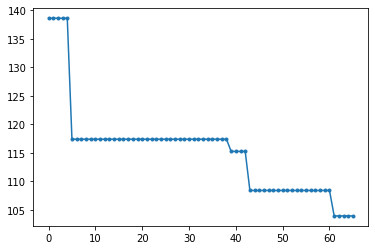

In [19]:
loss = result['dump']['best']['loss']
plt.plot(loss, '.-')

In [20]:
dump_genes = pd.DataFrame(result['dump']['best']['genes'].reshape(-1, len(sol_best)),
                          columns=config['runtime']['m_index'])
dump_genes

ec_name    common                                                              \
g_name        c_p       c_m      a0_m      b0_m   delta_m       s_m      a0_h   
0        7.136866  0.433124  0.150627  3.007845  4.171393  4.487114  0.144857   
1        0.731104  0.183021  0.526415  5.898071  0.319623  1.398271  0.270614   
2        7.136866  0.433124  0.150627  3.007845  4.171393  4.487114  0.144857   
3        7.136866  0.433124  0.150627  3.007845  4.171393  4.487114  0.144857   
4        7.136866  0.433124  0.150627  3.007845  4.171393  4.487114  0.144857   
..            ...       ...       ...       ...       ...       ...       ...   
61       0.121018  0.787491  3.300297  8.871890  2.133342  0.593313  2.325048   
62       1.764142  3.935739  6.149615  0.481619  2.629082  3.477817  1.211939   
63       0.121018  0.787491  3.300297  8.871890  2.133342  0.593313  2.325048   
64       0.121018  0.787491  3.300297  8.871890  2.133342  0.593313  2.325048   
65       0.121018  0.787491  3.300297  8.871890  2.133342  0.593313  2.325048   

ec_name                                ...                                 \
g_name       b0_h   delta_h       s_h  ...    g_leak     tau_z   v_half_m   
0        0.501000  0.643380  9.092322  ...  0.800174  0.308534  36.170266   
1        6.106010  0.127117  2.390371  ...  0.447970  0.311662  41.625134   
2        0.501000  0.643380  9.092322  ...  0.800174  0.308534  36.170266   
3        0.501000  0.643380  9.092322  ...  0.800174  0.308534  36.170266   
4        0.501000  0.643380  9.092322  ...  0.800174  0.308534  36.170266   
..            ...       ...       ...  ...       ...       ...        ...   
61       0.739371  1.644030  4.828410  ...  0.135701  0.275126  34.343453   
62       3.648767  0.436357  1.155533  ...  2.657434  0.230696  21.648079   
63       0.739371  1.644030  4.828410  ...  0.135701  0.275126  34.343453   
64       0.739371  1.644030  4.828410  ...  0.135701  0.275126  34.343453   
65       0.739371  1.644030  4.828410  ...  0.135701  0.275126  34.343453   

ec_name                                                                trace_1  
g_name    v_half_h       k_m       k_h  x_c_comp  x_r_comp     alpha     v_off  
0        98.820813  2.218885  1.141054  0.184189  0.381219  0.738215  1.344830  
1        69.580948  4.613796  7.523488  0.276890  0.184009  0.701838  3.415037  
2        98.820813  2.218885  1.141054  0.184189  0.381219  0.738215  1.344830  
3        98.820813  2.218885  1.141054  0.184189  0.381219  0.738215  1.344830  
4        98.820813  2.218885  1.141054  0.184189  0.381219  0.738215  1.344830  
..             ...       ...       ...       ...       ...       ...       ...  
61       97.086160  6.337108  6.308816  0.131354  0.219207  0.733290  3.421467  
62       99.183433  9.830001  3.159156  1.056795  1.024053  0.799847 -4.401723  
63       97.086160  6.337108  6.308816  0.131354  0.219207  0.733290  3.421467  
64       97.086160  6.337108  6.308816  0.131354  0.219207  0.733290  3.421467  
65       97.086160  6.337108  6.308816  0.131354  0.219207  0.733290  3.421467  

[66 rows x 28 columns]

# Recreate solution

In [21]:
sys.path.append('src/model')
from ina_model import InaModel
from solmodel import SolModel

In [22]:
filename_so = config['runtime']['filename_so_abs']
model = InaModel(filename_so)

SolModel.model = model
SolModel.config = config.copy()

sol = SolModel(x=sol_best)

In [23]:
sol.update()

In [24]:
sol

Solution = {
    x    = [ 0.12101847  0.78749121  3.30029718  8.87189003  2.13334245  0.59331292
  2.32504751  0.73937079  1.64402975  4.82841001  0.28025589  5.14346661
  9.5507971   4.24440846  9.11739406  1.23631503  0.74668635  0.35162514
  0.13570098  0.27512635 34.34345327 97.08616041  6.33710833  6.3088162
  0.1313539   0.21920743  0.73329029  3.42146698],
    y    = 102.39752742746349,
    data = {'phenotype': {'trace_1': name   v_comp   v_p        v_m         m         h         j     I_out
0       -80.0 -80.0 -76.424601  0.001305  0.036438  0.036438 -4.990976
1       -80.0 -80.0 -76.424601  0.001305  0.036438  0.036438 -4.990976
2       -80.0 -80.0 -76.424601  0.001305  0.036438  0.036438 -4.990976
3       -80.0 -80.0 -76.424601  0.001305  0.036438  0.036438 -4.990976
4       -80.0 -80.0 -76.424601  0.001305  0.036438  0.036438 -4.990976
...       ...   ...        ...       ...       ...       ...       ...
99995   -80.0 -80.0 -76.424602  0.001305  0.021215  0.036362 -4.99095

[]

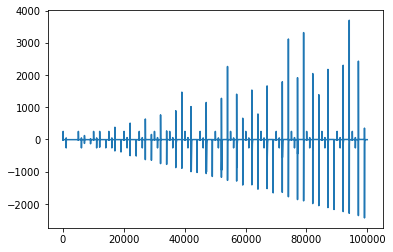

In [26]:
plt.plot(sol['phenotype']['trace_1']['I_out'])
plt.plot()